In [1]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append("../../")

from experiment import Exp

from dataloaders import data_set,data_dict
import torch
import yaml
import os

# 参数设置

# 训练参数 
除了路径 其他不要变

In [2]:
class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

args = dotdict()   
# TODO change the path as relative path
args.to_save_path     = r"E:\TECO_Works\Conference\ISWC2022\Run_logs"              
args.freq_save_path   = r"E:\TECO_Works\Conference\ISWC2022\Freq_data"
args.window_save_path = r"E:\TECO_Works\Conference\ISWC2022\Sliding_window"
args.root_path        = r"E:\datasets"


args.drop_transition  = False
args.datanorm_type    = "standardization" # None ,"standardization", "minmax"


args.batch_size       = 256                                                     
args.shuffle          = True
args.drop_last        = False
args.train_vali_quote = 0.90                                           


# training setting 
args.train_epochs            = 150

args.learning_rate           = 0.001  
args.learning_rate_patience  = 5
args.learning_rate_factor    = 0.1


args.early_stop_patience     = 15

args.use_gpu                 = True if torch.cuda.is_available() else False
args.gpu                     = 0
args.use_multi_gpu           = False

args.optimizer               = "Adam"
args.criterion               = "CrossEntropy"

## 数据参数



In [3]:
args.seed                             = 1


args.data_name                        =  "hapt"

args.wavelet_filtering                = True
args.wavelet_filtering_regularization = True
args.wavelet_filtering_finetuning     = True
args.wavelet_filtering_finetuning_percent = 0.5
args.wavelet_filtering_learnable      = False
args.wavelet_filtering_layernorm      = False

args.regulatization_tradeoff          = 0
args.number_wavelet_filtering         = 6


args.difference       = True 
args.filtering        =  False
args.magnitude        =  False
args.weighted_sampler = False




args.pos_select       = None
args.sensor_select    = None


args.representation_type = "time"
args.exp_mode            = "LOCV"
if args.data_name      ==  "skodar":
    args.exp_mode            = "SOCV"
config_file = open('../../configs/data.yaml', mode='r')
data_config = yaml.load(config_file, Loader=yaml.FullLoader)
config = data_config[args.data_name]

args.root_path       = os.path.join(args.root_path,config["filename"])
args.sampling_freq   = config["sampling_freq"]
args.num_classes     =  config["num_classes"]
window_seconds       = config["window_seconds"]
args.windowsize      =   int(window_seconds * args.sampling_freq) 
args.input_length    =  args.windowsize
# input information
args.c_in            = config["num_channels"]


if args.difference:
    args.c_in = args.c_in*2

if args.wavelet_filtering :
    
    if args.windowsize%2==1:
        N_ds = int(torch.log2(torch.tensor(args.windowsize-1)).floor()) - 2
    else:
        N_ds = int(torch.log2(torch.tensor(args.windowsize)).floor()) - 2

    args.f_in            =  args.number_wavelet_filtering*N_ds+1
else:
    args.f_in            =  1



## 模型参数

In [4]:
args.filter_scaling_factor = 0.5
args.model_type              = "deepconvlstm"#"deepconvlstm"#"sahar" #"deepconvlstm"

In [5]:
args.model_type              = "tinyhar"#"deepconvlstm"#"sahar" #"deepconvlstm"

args.cross_channel_interaction_type = "attn"
args.cross_channel_aggregation_type = "FC"
args.temporal_info_interaction_type = "gru"
args.temporal_info_aggregation_type = "FC"

In [6]:
# cross_channel_interaction_type = "attn",    # attn  transformer  identity
# cross_channel_aggregation_type = "filter",  # filter  naive  FC
# temporal_info_interaction_type = "gru",     # gru  lstm  attn  transformer  identity
# temporal_info_aggregation_type = "FC",      # naive  filter  FC 

# 实验

In [5]:
# 如果我们设置为 
args.wavelet_filtering_learnable      = False
exp = Exp(args)

Use GPU: cuda:0
clone the  wavefiler weight
Wavelet Filtering Regularization
Build the DeepConvLSTM model!
Done!
Parameter : 136459
Set the seed as :  1


In [6]:
# 如果我们设置为 
# args.wavelet_filtering_learnable      = True
# exp = Exp(args)

In [ ]:
exp.train()

 ----------------------- load all the data -------------------
Channel Augmentation : Differencing
-----------------------Sliding file are generated -----------------------
-----------------------Sliding file are generated -----------------------
================ LOCV Mode ====================
================ 30 CV ======================
================ the 0 th CV Experiment ================ 
Leave one Out Experiment : The 1 Part as the test
[-] Target sampling weights:  [0.0006689  0.00068213 0.00073746 0.00061275 0.00056243 0.00056754
 0.00746269 0.01041667 0.00641026 0.00719424 0.00534759 0.00724638]
Train data number :  10339
The number of classes is :  12
The input_length  is :  128
The channel_in is :  12
Validation data number :  1149
Test data number :  6632
================ Build the model ================ 
clone the  wavefiler weight
Wavelet Filtering Regularization
Build the DeepConvLSTM model!
Epoch: 1 cost time: 19.934316396713257
VALI: Epoch: 1, Steps: 41 | Train Loss:

VALI: Epoch: 26, Steps: 41 | Train Loss: 0.1438145  Vali Loss: 0.1176414 Vali Accuracy: 0.9495213  Vali weighted F1: 0.9497440  Vali macro F1 0.8124129 
new best score!!!!
Validation loss decreased (0.136639 --> 0.117641).  Saving model ...
new best score!!!!
Epoch: 27 cost time: 15.446749687194824
VALI: Epoch: 27, Steps: 41 | Train Loss: 0.1413723  Vali Loss: 0.1260787 Vali Accuracy: 0.9451697  Vali weighted F1: 0.9454290  Vali macro F1 0.8133892 
EarlyStopping counter: 1 out of 15
Learning rate adjusting counter: 1 out of 5
Epoch: 28 cost time: 15.954361915588379
VALI: Epoch: 28, Steps: 41 | Train Loss: 0.1319816  Vali Loss: 0.1155069 Vali Accuracy: 0.9521323  Vali weighted F1: 0.9522180  Vali macro F1 0.8312315 
new best score!!!!
Validation loss decreased (0.117641 --> 0.115507).  Saving model ...
new best score!!!!
Epoch: 29 cost time: 16.241944313049316
VALI: Epoch: 29, Steps: 41 | Train Loss: 0.1273131  Vali Loss: 0.0992521 Vali Accuracy: 0.9625762  Vali weighted F1: 0.9622575  

Epoch: 55 cost time: 16.784409999847412
VALI: Epoch: 55, Steps: 41 | Train Loss: 0.0550330  Vali Loss: 0.0744088 Vali Accuracy: 0.9738903  Vali weighted F1: 0.9744311  Vali macro F1 0.8826548 
new best score!!!!
Validation loss decreased (0.074537 --> 0.074409).  Saving model ...
new best score!!!!
Epoch: 56 cost time: 13.446593999862671
VALI: Epoch: 56, Steps: 41 | Train Loss: 0.0542631  Vali Loss: 0.0773809 Vali Accuracy: 0.9756310  Vali weighted F1: 0.9760482  Vali macro F1 0.8853431 
EarlyStopping counter: 1 out of 15
Learning rate adjusting counter: 1 out of 5
Epoch: 57 cost time: 20.700225591659546
VALI: Epoch: 57, Steps: 41 | Train Loss: 0.0547315  Vali Loss: 0.0747844 Vali Accuracy: 0.9747607  Vali weighted F1: 0.9752771  Vali macro F1 0.8828570 
EarlyStopping counter: 2 out of 15
Learning rate adjusting counter: 2 out of 5
Epoch: 58 cost time: 20.180447578430176
VALI: Epoch: 58, Steps: 41 | Train Loss: 0.0537085  Vali Loss: 0.0762277 Vali Accuracy: 0.9738903  Vali weighted F1:

Fine Tuning Epoch: 12 cost time: 12.748138189315796
Fine Tuning VALI: Epoch: 12, Steps: 41 | Train Loss: 0.0568015  Vali Loss: 0.0855754 Vali Accuracy: 0.9730200  Vali weighted F1: 0.9728546  Vali macro F1 0.8528319 
new best score!!!!
Validation loss decreased (0.086045 --> 0.085575).  Saving model ...
new best score!!!!
Fine Tuning Epoch: 13 cost time: 12.024740219116211
Fine Tuning VALI: Epoch: 13, Steps: 41 | Train Loss: 0.0559659  Vali Loss: 0.0848031 Vali Accuracy: 0.9721497  Vali weighted F1: 0.9719287  Vali macro F1 0.8473756 
new best score!!!!
Validation loss decreased (0.085575 --> 0.084803).  Saving model ...
new best score!!!!
Fine Tuning Epoch: 14 cost time: 13.243718385696411
Fine Tuning VALI: Epoch: 14, Steps: 41 | Train Loss: 0.0558271  Vali Loss: 0.0846134 Vali Accuracy: 0.9738903  Vali weighted F1: 0.9736863  Vali macro F1 0.8610486 
new best score!!!!
Validation loss decreased (0.084803 --> 0.084613).  Saving model ...
new best score!!!!
Fine Tuning Epoch: 15 cost t

Fine Tuning Epoch: 39 cost time: 15.039772987365723
Fine Tuning VALI: Epoch: 39, Steps: 41 | Train Loss: 0.0470446  Vali Loss: 0.0782628 Vali Accuracy: 0.9765013  Vali weighted F1: 0.9767345  Vali macro F1 0.8835763 
EarlyStopping counter: 1 out of 15
Learning rate adjusting counter: 1 out of 5
Fine Tuning Epoch: 40 cost time: 16.431484937667847
Fine Tuning VALI: Epoch: 40, Steps: 41 | Train Loss: 0.0458082  Vali Loss: 0.0785233 Vali Accuracy: 0.9782419  Vali weighted F1: 0.9783246  Vali macro F1 0.8940407 
EarlyStopping counter: 2 out of 15
Learning rate adjusting counter: 2 out of 5
Fine Tuning Epoch: 41 cost time: 14.92349648475647
Fine Tuning VALI: Epoch: 41, Steps: 41 | Train Loss: 0.0458727  Vali Loss: 0.0789745 Vali Accuracy: 0.9756310  Vali weighted F1: 0.9757547  Vali macro F1 0.8790403 
EarlyStopping counter: 3 out of 15
Learning rate adjusting counter: 3 out of 5
Fine Tuning Epoch: 42 cost time: 15.541263818740845
Fine Tuning VALI: Epoch: 42, Steps: 41 | Train Loss: 0.045339

Epoch: 7 cost time: 20.851016759872437
VALI: Epoch: 7, Steps: 41 | Train Loss: 0.2709769  Vali Loss: 0.2537700 Vali Accuracy: 0.9168831  Vali weighted F1: 0.9146929  Vali macro F1 0.7538776 
new best score!!!!
Validation loss decreased (0.295195 --> 0.253770).  Saving model ...
new best score!!!!
Epoch: 8 cost time: 18.432823419570923
VALI: Epoch: 8, Steps: 41 | Train Loss: 0.2483678  Vali Loss: 0.2449927 Vali Accuracy: 0.9203463  Vali weighted F1: 0.9198016  Vali macro F1 0.7492254 
new best score!!!!
Validation loss decreased (0.253770 --> 0.244993).  Saving model ...
new best score!!!!
Epoch: 9 cost time: 18.483055114746094
VALI: Epoch: 9, Steps: 41 | Train Loss: 0.2326038  Vali Loss: 0.2229681 Vali Accuracy: 0.9212121  Vali weighted F1: 0.9196121  Vali macro F1 0.7924896 
new best score!!!!
Validation loss decreased (0.244993 --> 0.222968).  Saving model ...
new best score!!!!
Epoch: 10 cost time: 17.897296667099
VALI: Epoch: 10, Steps: 41 | Train Loss: 0.2075782  Vali Loss: 0.1948

Epoch: 36 cost time: 15.426740646362305
VALI: Epoch: 36, Steps: 41 | Train Loss: 0.0647135  Vali Loss: 0.1224331 Vali Accuracy: 0.9593074  Vali weighted F1: 0.9590946  Vali macro F1 0.8377477 
EarlyStopping counter: 2 out of 15
Learning rate adjusting counter: 2 out of 5
Epoch: 37 cost time: 15.708279609680176
VALI: Epoch: 37, Steps: 41 | Train Loss: 0.0640993  Vali Loss: 0.1236319 Vali Accuracy: 0.9610390  Vali weighted F1: 0.9606342  Vali macro F1 0.8510251 
EarlyStopping counter: 3 out of 15
Learning rate adjusting counter: 3 out of 5
Epoch: 38 cost time: 19.335817575454712
VALI: Epoch: 38, Steps: 41 | Train Loss: 0.0624117  Vali Loss: 0.1237133 Vali Accuracy: 0.9601732  Vali weighted F1: 0.9598834  Vali macro F1 0.8456281 
EarlyStopping counter: 4 out of 15
Learning rate adjusting counter: 4 out of 5
Epoch: 39 cost time: 18.374048948287964
VALI: Epoch: 39, Steps: 41 | Train Loss: 0.0621122  Vali Loss: 0.1236788 Vali Accuracy: 0.9619048  Vali weighted F1: 0.9616583  Vali macro F1 0.

Fine Tuning Epoch: 14 cost time: 15.576738357543945
Fine Tuning VALI: Epoch: 14, Steps: 41 | Train Loss: 0.0647847  Vali Loss: 0.1288663 Vali Accuracy: 0.9636364  Vali weighted F1: 0.9631130  Vali macro F1 0.8537791 
EarlyStopping counter: 10 out of 15
Learning rate adjusting counter: 5 out of 5
Updating learning rate to 1e-05
Fine Tuning Epoch: 15 cost time: 14.119048595428467
Fine Tuning VALI: Epoch: 15, Steps: 41 | Train Loss: 0.0658515  Vali Loss: 0.1287079 Vali Accuracy: 0.9619048  Vali weighted F1: 0.9612644  Vali macro F1 0.8442849 
EarlyStopping counter: 11 out of 15
Learning rate adjusting counter: 1 out of 5
Fine Tuning Epoch: 16 cost time: 14.869597911834717
Fine Tuning VALI: Epoch: 16, Steps: 41 | Train Loss: 0.0636016  Vali Loss: 0.1289896 Vali Accuracy: 0.9619048  Vali weighted F1: 0.9612644  Vali macro F1 0.8442849 
EarlyStopping counter: 12 out of 15
Learning rate adjusting counter: 2 out of 5
Fine Tuning Epoch: 17 cost time: 16.982758045196533
Fine Tuning VALI: Epoch: 

Epoch: 21 cost time: 17.027824640274048
VALI: Epoch: 21, Steps: 41 | Train Loss: 0.1252056  Vali Loss: 0.1448566 Vali Accuracy: 0.9535684  Vali weighted F1: 0.9530900  Vali macro F1 0.8367417 
new best score!!!!
Validation loss decreased (0.151184 --> 0.144857).  Saving model ...
new best score!!!!
Epoch: 22 cost time: 17.32353925704956
VALI: Epoch: 22, Steps: 41 | Train Loss: 0.1181551  Vali Loss: 0.1513022 Vali Accuracy: 0.9458298  Vali weighted F1: 0.9455306  Vali macro F1 0.8164419 
EarlyStopping counter: 1 out of 15
Learning rate adjusting counter: 1 out of 5
Epoch: 23 cost time: 17.018955945968628
VALI: Epoch: 23, Steps: 41 | Train Loss: 0.1126898  Vali Loss: 0.1536251 Vali Accuracy: 0.9475494  Vali weighted F1: 0.9464680  Vali macro F1 0.8026008 
EarlyStopping counter: 2 out of 15
Learning rate adjusting counter: 2 out of 5
Epoch: 24 cost time: 16.677520990371704
VALI: Epoch: 24, Steps: 41 | Train Loss: 0.1030785  Vali Loss: 0.1574188 Vali Accuracy: 0.9475494  Vali weighted F1: 

Fine Tuning Epoch: 12 cost time: 13.46509337425232
Fine Tuning VALI: Epoch: 12, Steps: 41 | Train Loss: 0.0994995  Vali Loss: 0.1478370 Vali Accuracy: 0.9432502  Vali weighted F1: 0.9421075  Vali macro F1 0.7984291 
EarlyStopping counter: 4 out of 15
Learning rate adjusting counter: 4 out of 5
Fine Tuning Epoch: 13 cost time: 13.658628225326538
Fine Tuning VALI: Epoch: 13, Steps: 41 | Train Loss: 0.0976596  Vali Loss: 0.1459437 Vali Accuracy: 0.9423904  Vali weighted F1: 0.9412933  Vali macro F1 0.7922571 
EarlyStopping counter: 5 out of 15
Learning rate adjusting counter: 5 out of 5
Updating learning rate to 0.0001
Fine Tuning Epoch: 14 cost time: 13.916057109832764
Fine Tuning VALI: Epoch: 14, Steps: 41 | Train Loss: 0.0954552  Vali Loss: 0.1467955 Vali Accuracy: 0.9415305  Vali weighted F1: 0.9407684  Vali macro F1 0.7918393 
EarlyStopping counter: 6 out of 15
Learning rate adjusting counter: 1 out of 5
Fine Tuning Epoch: 15 cost time: 13.925333499908447
Fine Tuning VALI: Epoch: 15,

Fine Tuning Epoch: 39 cost time: 13.924137830734253
Fine Tuning VALI: Epoch: 39, Steps: 41 | Train Loss: 0.0837792  Vali Loss: 0.1399534 Vali Accuracy: 0.9509888  Vali weighted F1: 0.9500099  Vali macro F1 0.8104837 
EarlyStopping counter: 14 out of 15
Learning rate adjusting counter: 4 out of 5
Fine Tuning Epoch: 40 cost time: 12.663601398468018
Fine Tuning VALI: Epoch: 40, Steps: 41 | Train Loss: 0.0825738  Vali Loss: 0.1398999 Vali Accuracy: 0.9509888  Vali weighted F1: 0.9500099  Vali macro F1 0.8104837 
EarlyStopping counter: 15 out of 15
Early stopping
Loading the best finetuned validation model!
Fine Tuning Final Test Performance : Test Accuracy: 0.9050365  Test weighted F1: 0.9063840  Test macro F1 0.7570996 
================ the 3 th CV Experiment ================ 
Leave one Out Experiment : The 4 Part as the test
[-] Target sampling weights:  [0.00064226 0.00067159 0.00073421 0.00061728 0.00055804 0.00057274
 0.00787402 0.01052632 0.00641026 0.00675676 0.00520833 0.00729927]


VALI: Epoch: 25, Steps: 41 | Train Loss: 0.1028347  Vali Loss: 0.1543962 Vali Accuracy: 0.9490501  Vali weighted F1: 0.9497837  Vali macro F1 0.8138035 
new best score!!!!
Validation loss decreased (0.170870 --> 0.154396).  Saving model ...
new best score!!!!
Epoch: 26 cost time: 17.018367528915405
VALI: Epoch: 26, Steps: 41 | Train Loss: 0.0981024  Vali Loss: 0.1751652 Vali Accuracy: 0.9343696  Vali weighted F1: 0.9345556  Vali macro F1 0.7743830 
EarlyStopping counter: 1 out of 15
Learning rate adjusting counter: 1 out of 5
Epoch: 27 cost time: 16.873979568481445
VALI: Epoch: 27, Steps: 41 | Train Loss: 0.0958449  Vali Loss: 0.1607425 Vali Accuracy: 0.9473230  Vali weighted F1: 0.9475548  Vali macro F1 0.8265331 
EarlyStopping counter: 2 out of 15
Learning rate adjusting counter: 2 out of 5
Epoch: 28 cost time: 17.332298040390015
VALI: Epoch: 28, Steps: 41 | Train Loss: 0.0950645  Vali Loss: 0.1545539 Vali Accuracy: 0.9421416  Vali weighted F1: 0.9427428  Vali macro F1 0.8032156 
Ear

Fine Tuning Epoch: 2 cost time: 13.933107852935791
Fine Tuning VALI: Epoch: 2, Steps: 41 | Train Loss: 0.0963196  Vali Loss: 0.1572995 Vali Accuracy: 0.9430052  Vali weighted F1: 0.9425339  Vali macro F1 0.7873399 
new best score!!!!
Validation loss decreased (0.160621 --> 0.157300).  Saving model ...
new best score!!!!
Fine Tuning Epoch: 3 cost time: 13.798810482025146
Fine Tuning VALI: Epoch: 3, Steps: 41 | Train Loss: 0.0931832  Vali Loss: 0.1547114 Vali Accuracy: 0.9447323  Vali weighted F1: 0.9440394  Vali macro F1 0.7956756 
new best score!!!!
Validation loss decreased (0.157300 --> 0.154711).  Saving model ...
new best score!!!!
Fine Tuning Epoch: 4 cost time: 13.624964952468872
Fine Tuning VALI: Epoch: 4, Steps: 41 | Train Loss: 0.0894022  Vali Loss: 0.1559725 Vali Accuracy: 0.9430052  Vali weighted F1: 0.9428381  Vali macro F1 0.7884153 
EarlyStopping counter: 1 out of 15
Learning rate adjusting counter: 1 out of 5
Fine Tuning Epoch: 5 cost time: 14.391306161880493
Fine Tuning

Fine Tuning Epoch: 29 cost time: 11.8422212600708
Fine Tuning VALI: Epoch: 29, Steps: 41 | Train Loss: 0.0654710  Vali Loss: 0.1511776 Vali Accuracy: 0.9464594  Vali weighted F1: 0.9462771  Vali macro F1 0.8136016 
EarlyStopping counter: 11 out of 15
Learning rate adjusting counter: 1 out of 5
Fine Tuning Epoch: 30 cost time: 10.70497465133667
Fine Tuning VALI: Epoch: 30, Steps: 41 | Train Loss: 0.0672510  Vali Loss: 0.1510865 Vali Accuracy: 0.9464594  Vali weighted F1: 0.9462771  Vali macro F1 0.8136016 
EarlyStopping counter: 12 out of 15
Learning rate adjusting counter: 2 out of 5
Fine Tuning Epoch: 31 cost time: 10.62252402305603
Fine Tuning VALI: Epoch: 31, Steps: 41 | Train Loss: 0.0664330  Vali Loss: 0.1511593 Vali Accuracy: 0.9464594  Vali weighted F1: 0.9464288  Vali macro F1 0.8124367 
EarlyStopping counter: 13 out of 15
Learning rate adjusting counter: 3 out of 5
Fine Tuning Epoch: 32 cost time: 10.79741907119751
Fine Tuning VALI: Epoch: 32, Steps: 41 | Train Loss: 0.0652537

Epoch: 22 cost time: 16.74800729751587
VALI: Epoch: 22, Steps: 41 | Train Loss: 0.1328419  Vali Loss: 0.1630444 Vali Accuracy: 0.9357081  Vali weighted F1: 0.9344676  Vali macro F1 0.7981091 
new best score!!!!
Validation loss decreased (0.168742 --> 0.163044).  Saving model ...
new best score!!!!
Epoch: 23 cost time: 16.1378014087677
VALI: Epoch: 23, Steps: 41 | Train Loss: 0.1338151  Vali Loss: 0.1700758 Vali Accuracy: 0.9339705  Vali weighted F1: 0.9331024  Vali macro F1 0.7996929 
EarlyStopping counter: 1 out of 15
Learning rate adjusting counter: 1 out of 5
Epoch: 24 cost time: 17.833741903305054
VALI: Epoch: 24, Steps: 41 | Train Loss: 0.1205210  Vali Loss: 0.1674326 Vali Accuracy: 0.9383145  Vali weighted F1: 0.9377988  Vali macro F1 0.7942166 
EarlyStopping counter: 2 out of 15
Learning rate adjusting counter: 2 out of 5
Epoch: 25 cost time: 18.521722555160522
VALI: Epoch: 25, Steps: 41 | Train Loss: 0.1128635  Vali Loss: 0.1537081 Vali Accuracy: 0.9365769  Vali weighted F1: 0.

In [6]:
dataset = data_dict[args.data_name](args)

 ----------------------- load all the data -------------------
-----------------------Sliding file are generated -----------------------
-----------------------Sliding file are generated -----------------------


In [7]:
import numpy as np

In [8]:
start_index = dataset.train_slidingwindows[0][1]
end_index   = dataset.train_slidingwindows[0][2]
sample_x_1    = dataset.data_x.iloc[start_index:end_index, 1:-1].values

start_index = dataset.train_slidingwindows[100][1]
end_index   = dataset.train_slidingwindows[100][2]
sample_x_2    = dataset.data_x.iloc[start_index:end_index, 1:-1].values

temp_1 = np.expand_dims(sample_x_1,0)
temp_2 = np.expand_dims(sample_x_2,0)
combined_x = np.concatenate([temp_1,temp_2],axis=0)
combined_x = np.expand_dims(combined_x,1)
combined_x = torch.tensor(combined_x).double().to(exp.device)
print(combined_x.shape)

torch.Size([2, 1, 128, 6])


In [9]:
out = exp.model(combined_x)
out = out.cpu().detach().numpy()

In [10]:
out.shape

(2, 31, 128, 6)

In [20]:
weight = exp.model.wave_conv.wavelet_conv.weight.cpu().detach().numpy()

In [18]:
for n,p in exp.model.named_parameters():
    print(n)

gamma
wave_conv.wavelet_conv.weight


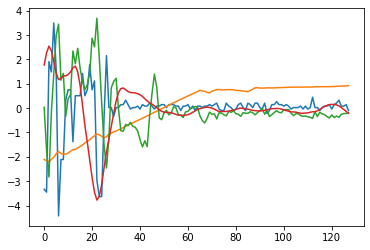

In [23]:
import matplotlib.pyplot as plt
index1 = 0
index2 = 0

plt.figure()
plt.plot(out[0,0,:,index2])
plt.plot(out[0,1,:,index2])
plt.plot(out[0,2,:,index2])
plt.plot(out[0,3,:,index2])

In [6]:
# 如果我们设置为 
# args.wavelet_filtering_learnable      = True
# exp = Exp(args)